# Binary Sentiment Analysis of Hotel Reviews

## Setting up the environment

In [1]:
 # Mount a connection between our Colab instance and Google Drive
 #  (we will store the Python environment here)
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks/nlpEnv', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/drive


In [2]:
# installing  The 'sacremoses' distribution
# to resolve the error
# DistributionNotFound: The 'sacremoses' distribution was not found
# and is required by the application

!pip install transformers -U 

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.4 MB 10.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 54.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3 MB 75.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61 kB 735 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 59.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
# installing dataset
!pip install datasets

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 298 kB 8.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 243 kB 67.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132 kB 69.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 50.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 160 kB 70.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 192 kB 93.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 271 kB 86.7 MB/s 


In [4]:
!pip install --upgrade pyarrow

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25.6 MB 1.4 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 3.0.0
    Uninstalling pyarrow-3.0.0:
      Successfully uninstalled pyarrow-3.0.0


## Importing libraries

In [26]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import pyarrow as pa
import pyarrow.dataset as ds

import datasets
from datasets import Dataset, load_metric
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          TrainingArguments,
                          Trainer)

import torch



## Loading and preprocessing the data

### Loading and exploring the data

In [3]:
# loading the data
raw_datasets = pd.read_csv("review_dataset.csv", index_col=0)


In [4]:
raw_datasets.head()

review  rating  sentiment
0  Very warm and welcoming staff!\nThe rooms were...       5          1
1  What a lovely place to stay. Beautiful bungalo...       5          1
2  A fantastic place where it's worth spending so...       5          1
3  We have stayed at Ecolodge Ravoraha for 12 day...       5          1
4  During our whole trip in Madagascar, this was ...       3          0

In [5]:
raw_datasets.tail()

review  rating  sentiment
1730           Easy process but very long time find out       1          0
1731                                              niceÔΩû       4          1
1732                        Low price with cozy place üòç       5          1
1733  Stayed one night. Very luxury room with a good...       5          1
1734         Such a nice and comfortable place to stay.       5          1

In [6]:
raw_datasets.describe().T

count      mean       std  min  25%  50%  75%  max
rating     5676.0  3.410500  1.603055  1.0  2.0  4.0  5.0  5.0
sentiment  5676.0  0.577343  0.494025  0.0  0.0  1.0  1.0  1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa52bcd790>,
      dtype=object)

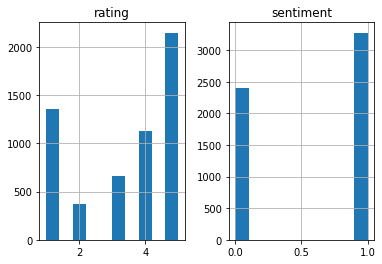

In [7]:
raw_datasets.hist()

In [31]:
# creating a new pd.DataFrame
raw_df =  raw_datasets[["review", "sentiment"]]

# creating train, test and validation data
train_val, test = train_test_split(raw_df,
                                   stratify=raw_datasets["sentiment"],
                                   test_size=0.1)

# separate train_val into train and validation
train_raw, val_raw = train_test_split(train_val,
                                   stratify=train_val["sentiment"],
                                   test_size=0.1)

### Creating Dataset object

In [32]:
# defining a function which creates and returns
# a Dataset object from a pandas dataframe
# input columns must be "review", "sentiment"

def pandas_to_dataset(input_df):
    df = input_df.rename({"review": "text",
                        "sentiment": "label"},
                        axis=1)

    return Dataset(pa.Table.from_pandas(df))


In [34]:
train_ds = pandas_to_dataset(train_raw)
val_ds = pandas_to_dataset(val_raw)
test_ds = pandas_to_dataset(test)

print(f"train_ds:\n{train_ds}\n\nval_ds:\n{val_ds}\n\ntest_ds:\n{test_ds}\n")

train_ds:
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 4597
})

val_ds:
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 511
})

test_ds:
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 568
})



In [35]:
train_ds["text"][:3]

['Really amazing stay! so clean, so hospitable and Ms Nu goes above and beyond to ensure you have a comfortable stay. She also is a travel agent and can help you book things on your trip! ‚Ä¶',
 'This is my first time in Hong Kong) the first day when I arrived to Hong Kong i try to find my hostel I spend a lot of money and time to find it, hostel is so difficult to find and when i try to call them number isn‚Äôt working ( omg by the ‚Ä¶',
 'Cozy spot! We got a double cabin and it was surprisingly comfortable and quiet. Bathrooms are remodeled and nice. Everyone arrives around 10pm, so get ready for bed 9 or earlier or later than 11 to avoid bathroom lines. The only complaint ‚Ä¶']

In [36]:
train_ds["label"][:3]

[1, 0, 1]

### Tokenizing

In [15]:
# initializing the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# defining a tokenizer function
# to be used as argument of the .map method 
# of a datasets.dataset_dict.DatasetDict object

def tokenize_function(elements):
    return tokenizer(elements["text"],
                     max_length=512,
                     padding="max_length",
                     truncation=True)


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [37]:
tokenized_train = train_ds.map(tokenize_function,
                               batched=True)

tokenized_val = val_ds.map(tokenize_function,
                               batched=True)

tokenized_test = test_ds.map(tokenize_function,
                               batched=True)


  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [38]:
tokenized_train

Dataset({
    features: ['__index_level_0__', 'attention_mask', 'input_ids', 'label', 'text', 'token_type_ids'],
    num_rows: 4597
})

In [40]:
tokenized_train = tokenized_train.remove_columns(['__index_level_0__'])
tokenized_val = tokenized_val.remove_columns(['__index_level_0__'])

## Creating and Training the Model

In [41]:
# initializing the BERT base pretrained model
model = AutoModelForSequenceClassification.\
            from_pretrained("bert-base-cased", num_labels=2)


loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.14.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading weights file https://huggingface.co/bert-base-cased/resolve/

In [42]:
# defining a classification head for the BERT base model
# we will train only this part 

# loading accuracy as metric
metric = load_metric("accuracy")

# defining a function wchi computes metric
def compute_metrics(eval_pred):
    probas, labels = eval_pred
    predictions = np.argmax(probas, axis=-1)

    return metric.compute(predictions=predictions,
                          references=labels)

# instatiate some subsset of the training arguments
training_args = TrainingArguments("test_trainer",
                                   evaluation_strategy="epoch")

# instantiate the Trainer
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_train,
                  eval_dataset=tokenized_val,
                  compute_metrics=compute_metrics)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [43]:
# training the classification head
trainer.train()


The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 4597
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1725


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 511
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 511
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-1500
Configuration saved in test_trainer/checkpoint-1500/config.json
Model weights saved in test_trainer/checkpoint-1500/pytorch

TrainOutput(global_step=1725, training_loss=0.3513502303413723, metrics={'train_runtime': 839.4675, 'train_samples_per_second': 16.428, 'train_steps_per_second': 2.055, 'total_flos': 3628564564469760.0, 'train_loss': 0.3513502303413723, 'epoch': 3.0})

In [45]:
# looking at the validation score
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 511
  Batch size = 8


{'epoch': 3.0,
 'eval_accuracy': 0.8610567514677103,
 'eval_loss': 0.4982817471027374,
 'eval_runtime': 10.2993,
 'eval_samples_per_second': 49.615,
 'eval_steps_per_second': 6.214}

### Evaluating the model

In [50]:
test_preds = trainer.predict(tokenized_test)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__.
***** Running Prediction *****
  Num examples = 568
  Batch size = 8


In [54]:
test_preds

PredictionOutput(predictions=array([[-2.9214237,  2.3802464],
       [ 2.9505901, -2.0324576],
       [-2.9674838,  2.290961 ],
       ...,
       [ 3.1131213, -2.3110783],
       [-2.8309677,  1.6959879],
       [ 2.9970677, -2.198716 ]], dtype=float32), label_ids=array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
    

In [56]:
type(test_preds)

transformers.trainer_utils.PredictionOutput

In [57]:
test_preds.metrics

{'test_accuracy': 0.8838028169014085,
 'test_loss': 0.45808860659599304,
 'test_runtime': 11.3283,
 'test_samples_per_second': 50.14,
 'test_steps_per_second': 6.268}